Problem Statement: - 

A Mobile Phone manufacturing company wants to launch its three brand new phone into the market, but before going with its traditional
marketing approach this time it want to analyze the data of its previous model sales in different regions and you have been hired as an
Data Scientist to help them out, use the Association rules concept and provide your insights to the company’s marketing team to improve its sales.


Business Objective:-

1)Determin which products features, pricing strategies have previosly led to higher sales.
2)Help to marketing team to develop  a more effective products base on past history.
3)Recommend a complementry product based on past patterns of customers purchses.

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
#Uplaod file
phone = pd.read_csv("C:/Assignments(DS)/myphonedata.csv")

Exploratory Data Analysis (EDA)

In [4]:
phone.shape
#11 rows and 6 columns

(11, 6)

In [5]:
phone.columns

Index(['red', 'white', 'green', 'yellow', 'orange', 'blue'], dtype='object')

In [6]:
phone.dtypes

red       int64
white     int64
green     int64
yellow    int64
orange    int64
blue      int64
dtype: object

In [7]:
phone.isnull().sum()
#no any null value

red       0
white     0
green     0
yellow    0
orange    0
blue      0
dtype: int64

In [8]:
phone.describe()
#there is no any large difference between min, max, std. hence no need of normalization.

,red,white,green,yellow,orange,blue
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.545455,0.636364,0.181818,0.090909,0.181818,0.545455
std,0.522233,0.504525,0.404520,0.301511,0.404520,0.522233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
phone.head()

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1


Data-Preprocessing

In [10]:
#Boxplot
#now we check the outlier of each column

<Axes: >

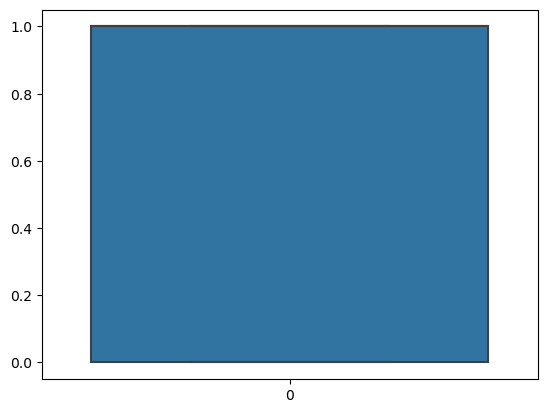

In [11]:
sns.boxplot(phone['red'])
#no outlier

<Axes: >

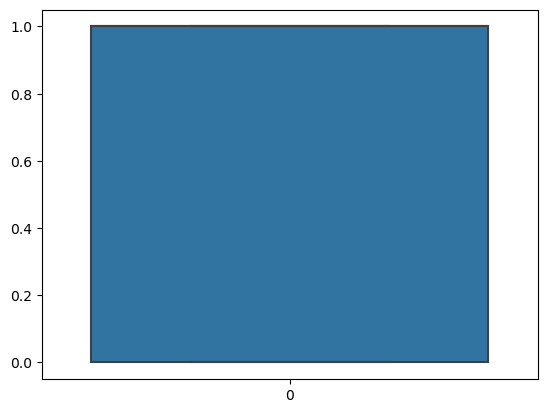

In [12]:
sns.boxplot(phone['white'])
#no outlier

<Axes: >

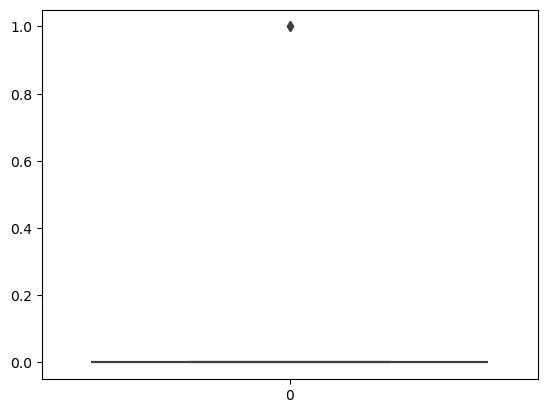

In [13]:
sns.boxplot(phone['green'])
#outlier

<Axes: >

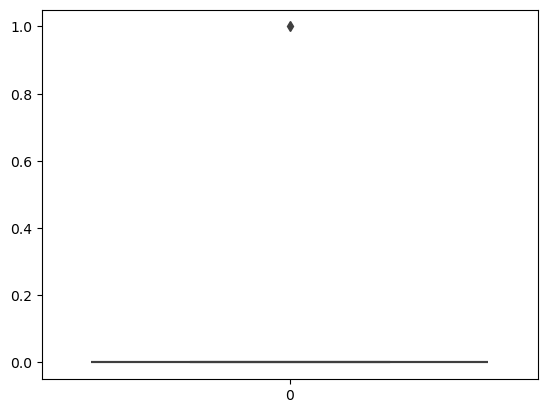

In [14]:
sns.boxplot(phone['yellow'])
#no outlier

<Axes: >

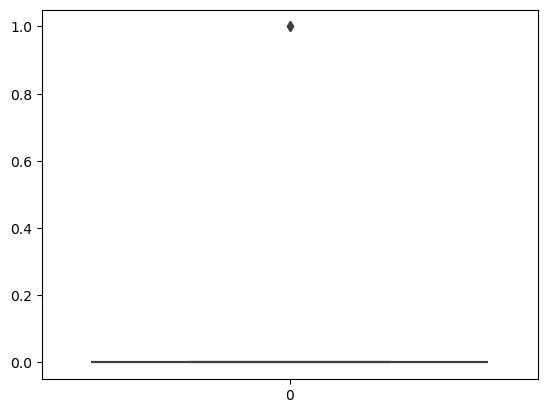

In [15]:
sns.boxplot(phone['orange'])
#outlier

<Axes: >

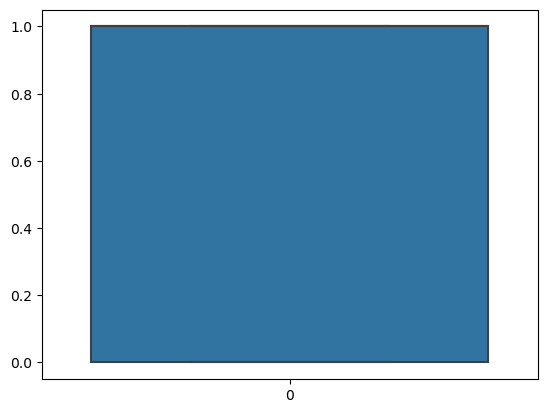

In [16]:
sns.boxplot(phone['blue'])
#no outlier

In [17]:
#from boxplot it is observed that 'green','yellow', 'orange' column has outlier

In [18]:
#we have to remove it by using IQR technique

<Axes: >

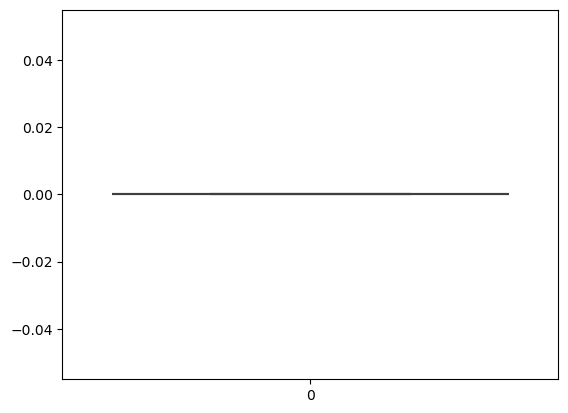

In [19]:
#1)green
#q1=0.25 percentile
#q3 = 0.75 percentile
q1 = phone['green'].quantile(0.25)
q3 = phone['green'].quantile(0.75)
iqr = q3-q1
#determine limits for outlier
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
#Remove outlier
phone['green'] = phone.loc[(phone['green']>=lower_limit) & (phone['green']<=upper_limit), 'green']

sns.boxplot(phone['green'])
#again from box plot we can see that outlier has removed

<Axes: >

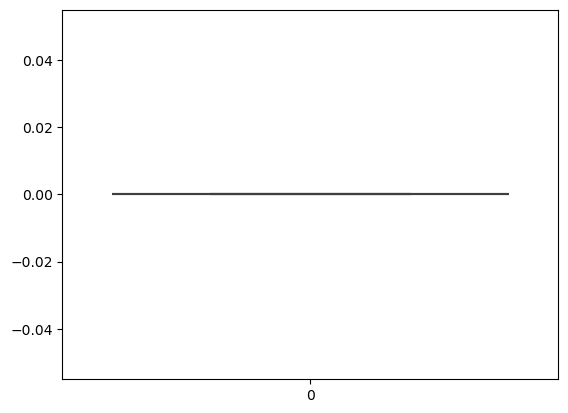

In [20]:
#2)yellow
#q1=0.25 percentile
#q3 = 0.75 percentile
q1 = phone['yellow'].quantile(0.25)
q3 = phone['yellow'].quantile(0.75)
iqr = q3-q1
#determine limits for outlier
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
#Remove outlier
phone['yellow'] = phone.loc[(phone['yellow']>=lower_limit) & (phone['yellow']<=upper_limit), 'yellow']

sns.boxplot(phone['yellow'])
#again from box plot we can see that outlier has removed

<Axes: >

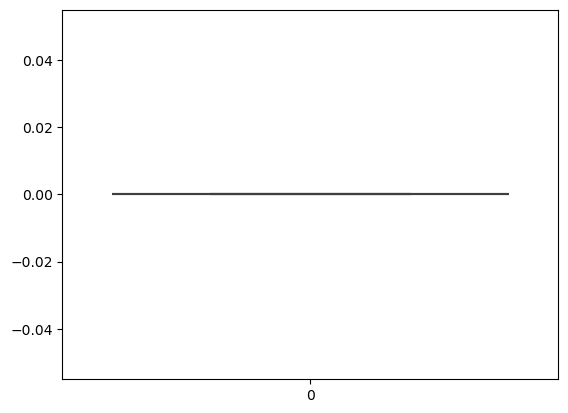

In [21]:
#3)orange
#q1=0.25 percentile
#q3 = 0.75 percentile
q1 = phone['orange'].quantile(0.25)
q3 = phone['orange'].quantile(0.75)
iqr = q3-q1
#determine limits for outlier
lower_limit = q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)
#Remove outlier
phone['orange'] = phone.loc[(phone['orange']>=lower_limit) & (phone['orange']<=upper_limit), 'orange']

sns.boxplot(phone['orange'])
#again from box plot we can see that outlier has removed

In [22]:
phone.isnull().sum()

red       0
white     0
green     2
yellow    1
orange    2
blue      0
dtype: int64

In [23]:
#now there some null value is generated which we can remove by mean imputation
phone.fillna(phone.mean(),inplace=True)

In [24]:
phone.isnull().sum()
#now there is no any null value in our data set

red       0
white     0
green     0
yellow    0
orange    0
blue      0
dtype: int64

In [26]:
#step 1: Convert a dataset into a proper form which is suitable for Apriori
te = TransactionEncoder()
k = te.fit_transform(phone)
phone1 = pd.DataFrame(k, columns = te.columns_)

In [28]:
#step 2: Apply Apriori algorithm to find frequent itemsets
for support in [0.05,0.04,0.03,0.02,0.01]:
    frequent = apriori(phone1, min_support=support, use_colnames=True)
    print(f"min_support={support}  number of frequent itemsets = {len(frequent)}")

min_support=0.05  number of frequent itemsets = 135
min_support=0.04  number of frequent itemsets = 135
min_support=0.03  number of frequent itemsets = 135
min_support=0.02  number of frequent itemsets = 135
min_support=0.01  number of frequent itemsets = 135


In [29]:
item_frequencies = phone1.sum().sort_values(ascending=False)
print("Item Frequencies: \n",item_frequencies)

Item Frequencies: 
 e    6
r    3
g    2
l    2
n    2
o    2
w    2
a    1
b    1
d    1
h    1
i    1
t    1
u    1
y    1
dtype: int64


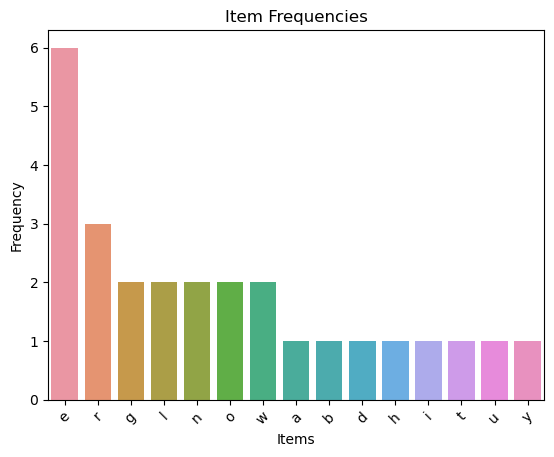

In [31]:
sns.barplot(x=item_frequencies.index, y=item_frequencies.values)
plt.xticks(rotation=45)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Item Frequencies')
plt.show()

In [37]:
#Load your file (already done)
df = pd.read_csv("C:/Assignments(DS)/myphonedata.csv")


In [38]:
# Apply the Apriori algorithm
df_bool = df.astype(bool)
frequent_itemsets = apriori(df_bool, min_support=0.05, use_colnames=True)


In [39]:
#step 3: # Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [40]:
#step 4: Output
print(frequent_itemsets)
# print(rules)
print(rules[['antecedents','consequents','support','confidence']])

     support              itemsets
0   0.545455                 (red)
1   0.636364               (white)
2   0.181818               (green)
3   0.090909              (yellow)
4   0.181818              (orange)
5   0.545455                (blue)
6   0.363636          (white, red)
7   0.090909          (green, red)
8   0.090909         (orange, red)
9   0.363636           (blue, red)
10  0.090909        (green, white)
11  0.181818       (orange, white)
12  0.363636         (white, blue)
13  0.090909   (green, white, red)
14  0.090909  (orange, white, red)
15  0.181818    (white, blue, red)
       antecedents     consequents   support  confidence
0          (white)           (red)  0.363636    0.571429
1            (red)         (white)  0.363636    0.666667
2           (blue)           (red)  0.363636    0.666667
3            (red)          (blue)  0.363636    0.666667
4         (orange)         (white)  0.181818    1.000000
5          (white)        (orange)  0.181818    0.285714
6     

Benefits:

Personalized Offers: By analyzing past sales data, the company can tailor offers and promotions based on customer preferences in different regions.
Targeted Product Launch: Customers in each region will receive marketing for phone models that align with their specific preferences, ensuring better satisfaction.
Improved Product Availability: The company can predict demand more accurately, ensuring that new models are available in regions where they are most likely to be popular.
Better Customer Experience: Customers will experience more relevant advertising, leading to a smoother purchasing journey tailored to their interests and needs.